In [1]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from matplotlib import cm
import lightgbm as lgb
from lightgbm import LGBMClassifier
import numpy as np

/Users/hanjiawei/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
data3=pd.read_csv('new_crime2.csv')
data3

,Unnamed: 0,Psa,Location_Block,Police_Districts,Lon,Lat,month,hour,min,day_time,Date,n_days,Day,DayOfWeek,Month,Year,CAT
0,0,1,800 BLOCK S BROAD ST,13.0,-75.166412,39.940070,4,12,50,12.83,2015-04-25,114,25,5,4,2015,THEFT
1,1,3,1500 BLOCK N 15TH ST,16.0,-75.160229,39.976134,10,18,18,18.30,2015-10-06,278,6,1,10,2015,THEFT
2,2,3,1500 BLOCK N 17TH ST,16.0,-75.163073,39.977872,10,0,49,0.82,2015-10-09,281,9,4,10,2015,THEFT
3,3,1,6500 BLOCK CASTOR AV,2.0,-75.075602,40.041270,11,8,39,8.65,2015-11-30,333,30,0,11,2015,THEFT
4,5,4,2600 BLOCK W THOMPSON ST,16.0,-75.178874,39.975724,12,12,29,12.48,2015-12-10,343,10,3,12,2015,THEFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110604,182343,4,3100 BLOCK N FRANKLIN ST,18.0,-75.142924,39.999500,3,7,35,7.58,2015-03-08,66,8,6,3,2015,VIOLENCE
110605,182344,3,4600 BLOCK WALNUT ST,14.0,-75.213679,39.955537,11,2,5,2.08,2015-11-01,304,1,6,11,2015,VIOLENCE
110606,182345,2,3300 BLOCK N SMEDLEY ST,21.0,-75.156581,40.003890,3,5,54,5.90,2015-03-08,66,8,6,3,2015,VIOLENCE
110607,182347,2,100 BLOCK N 10TH ST,5.0,-75.155966,39.954813,3,5,49,5.82,2015-03-08,66,8,6,3,2015,THEFT


In [3]:
data3.drop(columns=['Unnamed: 0','Day','DayOfWeek','Month'], inplace=True)
data3

,Psa,Location_Block,Police_Districts,Lon,Lat,month,hour,min,day_time,Date,n_days,Year,CAT
0,1,800 BLOCK S BROAD ST,13.0,-75.166412,39.940070,4,12,50,12.83,2015-04-25,114,2015,THEFT
1,3,1500 BLOCK N 15TH ST,16.0,-75.160229,39.976134,10,18,18,18.30,2015-10-06,278,2015,THEFT
2,3,1500 BLOCK N 17TH ST,16.0,-75.163073,39.977872,10,0,49,0.82,2015-10-09,281,2015,THEFT
3,1,6500 BLOCK CASTOR AV,2.0,-75.075602,40.041270,11,8,39,8.65,2015-11-30,333,2015,THEFT
4,4,2600 BLOCK W THOMPSON ST,16.0,-75.178874,39.975724,12,12,29,12.48,2015-12-10,343,2015,THEFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110604,4,3100 BLOCK N FRANKLIN ST,18.0,-75.142924,39.999500,3,7,35,7.58,2015-03-08,66,2015,VIOLENCE
110605,3,4600 BLOCK WALNUT ST,14.0,-75.213679,39.955537,11,2,5,2.08,2015-11-01,304,2015,VIOLENCE
110606,2,3300 BLOCK N SMEDLEY ST,21.0,-75.156581,40.003890,3,5,54,5.90,2015-03-08,66,2015,VIOLENCE
110607,2,100 BLOCK N 10TH ST,5.0,-75.155966,39.954813,3,5,49,5.82,2015-03-08,66,2015,THEFT


In [4]:
data3.drop(columns=['Psa','hour','min','Date'], inplace=True)
data3

,Location_Block,Police_Districts,Lon,Lat,month,day_time,n_days,Year,CAT
0,800 BLOCK S BROAD ST,13.0,-75.166412,39.940070,4,12.83,114,2015,THEFT
1,1500 BLOCK N 15TH ST,16.0,-75.160229,39.976134,10,18.30,278,2015,THEFT
2,1500 BLOCK N 17TH ST,16.0,-75.163073,39.977872,10,0.82,281,2015,THEFT
3,6500 BLOCK CASTOR AV,2.0,-75.075602,40.041270,11,8.65,333,2015,THEFT
4,2600 BLOCK W THOMPSON ST,16.0,-75.178874,39.975724,12,12.48,343,2015,THEFT
...,...,...,...,...,...,...,...,...,...
110604,3100 BLOCK N FRANKLIN ST,18.0,-75.142924,39.999500,3,7.58,66,2015,VIOLENCE
110605,4600 BLOCK WALNUT ST,14.0,-75.213679,39.955537,11,2.08,304,2015,VIOLENCE
110606,3300 BLOCK N SMEDLEY ST,21.0,-75.156581,40.003890,3,5.90,66,2015,VIOLENCE
110607,100 BLOCK N 10TH ST,5.0,-75.155966,39.954813,3,5.82,66,2015,THEFT


In [5]:
data3.drop(columns=['month','Year'], inplace=True)
data3

,Location_Block,Police_Districts,Lon,Lat,day_time,n_days,CAT
0,800 BLOCK S BROAD ST,13.0,-75.166412,39.940070,12.83,114,THEFT
1,1500 BLOCK N 15TH ST,16.0,-75.160229,39.976134,18.30,278,THEFT
2,1500 BLOCK N 17TH ST,16.0,-75.163073,39.977872,0.82,281,THEFT
3,6500 BLOCK CASTOR AV,2.0,-75.075602,40.041270,8.65,333,THEFT
4,2600 BLOCK W THOMPSON ST,16.0,-75.178874,39.975724,12.48,343,THEFT
...,...,...,...,...,...,...,...
110604,3100 BLOCK N FRANKLIN ST,18.0,-75.142924,39.999500,7.58,66,VIOLENCE
110605,4600 BLOCK WALNUT ST,14.0,-75.213679,39.955537,2.08,304,VIOLENCE
110606,3300 BLOCK N SMEDLEY ST,21.0,-75.156581,40.003890,5.90,66,VIOLENCE
110607,100 BLOCK N 10TH ST,5.0,-75.155966,39.954813,5.82,66,THEFT


In [6]:
le1 = LabelEncoder()
data3['Location_Block'] = le1.fit_transform(data3['Location_Block'])

In [7]:
data3

,Location_Block,Police_Districts,Lon,Lat,day_time,n_days,CAT
0,20761,13.0,-75.166412,39.940070,12.83,114,THEFT
1,3525,16.0,-75.160229,39.976134,18.30,278,THEFT
2,3527,16.0,-75.163073,39.977872,0.82,281,THEFT
3,18391,2.0,-75.075602,40.041270,8.65,333,THEFT
4,9009,16.0,-75.178874,39.975724,12.48,343,THEFT
...,...,...,...,...,...,...,...
110604,10724,18.0,-75.142924,39.999500,7.58,66,VIOLENCE
110605,13970,14.0,-75.213679,39.955537,2.08,304,VIOLENCE
110606,11204,21.0,-75.156581,40.003890,5.90,66,VIOLENCE
110607,549,5.0,-75.155966,39.954813,5.82,66,THEFT


In [8]:
le2 = LabelEncoder()
x=data3.drop(columns=['CAT'])
y = le2.fit_transform(data3['CAT'])

In [9]:
x

,Location_Block,Police_Districts,Lon,Lat,day_time,n_days
0,20761,13.0,-75.166412,39.940070,12.83,114
1,3525,16.0,-75.160229,39.976134,18.30,278
2,3527,16.0,-75.163073,39.977872,0.82,281
3,18391,2.0,-75.075602,40.041270,8.65,333
4,9009,16.0,-75.178874,39.975724,12.48,343
...,...,...,...,...,...,...
110604,10724,18.0,-75.142924,39.999500,7.58,66
110605,13970,14.0,-75.213679,39.955537,2.08,304
110606,11204,21.0,-75.156581,40.003890,5.90,66
110607,549,5.0,-75.155966,39.954813,5.82,66


In [10]:
y

array([2, 2, 2, ..., 3, 2, 2])

In [11]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.1,random_state=0)

In [12]:
import lightgbm as lgb
# Creating the model
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=['Police_Districts'])

params = {'boosting':'gbdt',
          'objective':'multiclass',
          'num_class':5,
          'max_delta_step':0.9,
          'min_data_in_leaf': 21,
          'learning_rate': 0.4,
          'max_bin': 465,
          'num_leaves': 41
         }

bst = lgb.train(params, train_data, 100)

predictions = bst.predict(X_test)

/Users/hanjiawei/anaconda3/lib/python3.7/site-packages/lightgbm/basic.py:1243: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


In [13]:
import numpy as np
#submission = pd.DataFrame(predictions,columns=le2.inverse_transform(np.linspace(0, 2, 3, dtype='int16')),index=X_test.index)
#submission.to_csv('LGBM_final3.csv', index_label='Id')

In [14]:
le2 = LabelEncoder()
data3['CAT'] = le2.fit_transform(data3['CAT'])

In [15]:
data3['CAT'].value_counts()

2    45816
1    41235
0    12304
3    11254
Name: CAT, dtype: int64

In [16]:
# 1、AUC
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
y_pred_pa = bst.predict(X_test)  # !!!注意lgm预测的是分数，类似 sklearn的predict_proba
roc_auc_score(y_test, y_pred_pa, average='micro')

ValueError: multi_class must be in ('ovo', 'ovr')

In [18]:
#  2、混淆矩阵
from sklearn import svm
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.externals import joblib
y_pred = y_pred_pa.argmax(axis=1)
confusion_matrix(y_test, y_pred )

array([[ 297,  530,  392,   30],
       [ 133, 2962, 1023,   27],
       [  66,  679, 3767,   32],
       [  53,  386,  638,   46]])

In [3]:
cfm=b = np.mat([[297,30,392,530],[53,46,638,386],[66,32,3767,679],[133,27,1023,2962]])
cfm

matrix([[ 297,   30,  392,  530],
        [  53,   46,  638,  386],
        [  66,   32, 3767,  679],
        [ 133,   27, 1023, 2962]])

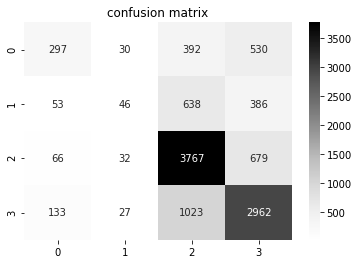

In [4]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


f,ax=plt.subplots()
ax.set_title('confusion matrix') #标题
ax.set_xlabel('predict') #x轴
ax.set_ylabel('true') #y轴
fig = sns.heatmap(cfm,annot=True,ax=ax,fmt='g',cmap="Greys") #画热力图
heatmap = fig.get_figure()
heatmap.savefig('热力图',dpi = 600)


NameError: name 'classes' is not defined

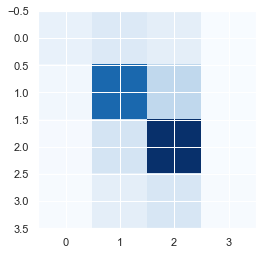

In [32]:
confusion=confusion_matrix(y_test, y_pred)
plt.imshow(confusion, cmap=plt.cm.Blues)
indices = range(len(confusion))
plt.xticks(indices, classes)
plt.yticks(indices, classes)
plt.colorbar()

for first_index in range(len(confusion)):
    for second_index in range(len(confusion[first_index])):
        plt.text(first_index, second_index, confusion[first_index][second_index])
plt.show()


In [33]:
#  3、经典-精确率、召回率、F1分数
precision_score(y_test, y_pred,average='micro')

0.6393635295181268

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.24      0.33      1249
           1       0.65      0.71      0.68      4145
           2       0.65      0.83      0.73      4544
           3       0.34      0.04      0.07      1123

    accuracy                           0.64     11061
   macro avg       0.54      0.46      0.45     11061
weighted avg       0.61      0.64      0.60     11061



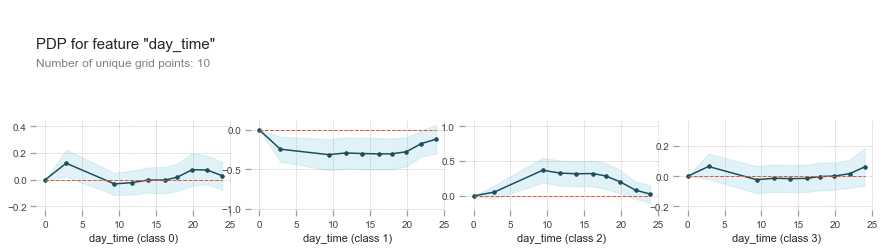

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from pdpbox import pdp

model = LGBMClassifier(**params).fit(x, y)

pdp_Pd = pdp.pdp_isolate(
    model=model,
    dataset=x,
    model_features=x.columns.tolist(),
    feature='day_time',
    n_jobs=-1)

pdp.pdp_plot(
    pdp_Pd,
    'day_time',
    ncols=4)
plt.savefig("data/temp.png",dpi=1000,bbox_inches = 'tight')
plt.show()


In [31]:
pdp_Pd

In [32]:
pdp.pdp_plot()

TypeError: pdp_plot() missing 2 required positional arguments: 'pdp_isolate_out' and 'feature_name'